In [1]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")

# API keys
from config import consumer_key, consumer_secret, access_token, access_token_secret


# Import and Initialize Sentiment Analyzer
#from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [3]:
# Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}


# Grab 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)
        


        # For each tweet store it into the dictionary
        for tweet in tweets:

            # All data is grabbed from the JSON returned by Twitter
             tweet_data["tweet_source"].append(tweet["user"]["name"])
             tweet_data["tweet_text"].append(tweet["text"])
             tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
             tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
             tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
             tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
             tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

print(tweet_data)

{'tweet_source': ['Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'Fox News', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'CNN', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'BBC News (World)', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News', 'CBS News'

In [4]:
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "tweets.csv"
tweet_df.to_csv(file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,https://t.co/XoB8GW2BUO,Sun May 24 19:17:43 +0000 2020,0.0000,0.000,1.000,0.000
1,Fox News,https://t.co/W5ZecEtF15,Sun May 24 17:48:41 +0000 2020,0.0000,0.000,1.000,0.000
2,Fox News,https://t.co/JzcVtRfMlM,Sun May 24 15:39:12 +0000 2020,0.0000,0.000,1.000,0.000
3,Fox News,https://t.co/OsPwYIeATZ,Sun May 24 15:38:28 +0000 2020,0.0000,0.000,1.000,0.000
4,Fox News,https://t.co/vW4jCHMKXZ,Sun May 24 02:01:23 +0000 2020,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
495,The New York Times,The coronavirus has upended the plans and prio...,Sat May 23 17:50:06 +0000 2020,0.0000,0.000,1.000,0.000
496,The New York Times,The N.B.A. is in the early stages of discussio...,Sat May 23 17:40:04 +0000 2020,0.0000,0.000,1.000,0.000
497,The New York Times,RT @xanalter: I've been following a strange co...,Sat May 23 17:30:09 +0000 2020,-0.4588,0.000,0.840,0.160
498,The New York Times,"""This is a Ramadan like no other. The pandemic...",Sat May 23 17:21:08 +0000 2020,-0.8126,0.080,0.605,0.315


In [5]:
tweet_df.count

<bound method DataFrame.count of            tweet_source                                         tweet_text  \
0              Fox News                            https://t.co/XoB8GW2BUO   
1              Fox News                            https://t.co/W5ZecEtF15   
2              Fox News                            https://t.co/JzcVtRfMlM   
3              Fox News                            https://t.co/OsPwYIeATZ   
4              Fox News                            https://t.co/vW4jCHMKXZ   
..                  ...                                                ...   
495  The New York Times  The coronavirus has upended the plans and prio...   
496  The New York Times  The N.B.A. is in the early stages of discussio...   
497  The New York Times  RT @xanalter: I've been following a strange co...   
498  The New York Times  "This is a Ramadan like no other. The pandemic...   
499  The New York Times  RT @NYTmag: We asked writers, artists, photogr...   

                         tweet

In [6]:
tweet_df["tweet_source"].unique()

array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [7]:
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

In [8]:
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

In [9]:
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,https://t.co/1l8RDv4zut,2020-05-17 17:38:28+00:00,0.0,0.0,1.0,0.0
1,Fox News,https://t.co/KFSNx2eghq,2020-05-17 18:49:04+00:00,0.0,0.0,1.0,0.0
2,Fox News,https://t.co/tIvz6yl2dX,2020-05-17 19:57:07+00:00,0.0,0.0,1.0,0.0
3,Fox News,https://t.co/pbi4v3gyqd,2020-05-17 21:04:39+00:00,0.0,0.0,1.0,0.0
4,Fox News,https://t.co/hkTXkJEkhp,2020-05-17 22:08:52+00:00,0.0,0.0,1.0,0.0


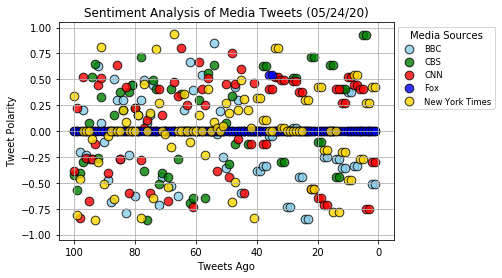

In [10]:
# Build scatter plot for tracking tweet polarity by tweet history
# Note how a few data munging tricks were used to obtain (-100 -> 0 tick marks)
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig(file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

In [11]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)

,tweet_vader_score
tweet_source,
BBC News (World),-0.083363
CBS News,0.062310
CNN,0.048000
Fox News,0.010846
The New York Times,0.002112


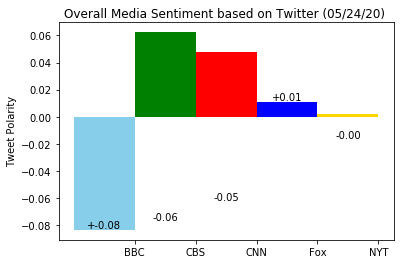

In [12]:
# Store all polarities in a tuple
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["The New York Times"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="green")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="red")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='blue')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='gold')


# Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')
    
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

# Orient widths, add labels, tick marks, etc. 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-Fig2.png"
plt.savefig(file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show Figure
fig.show()  